# Classification

This exercise consists of three parts. Finish the first part to get a mark of 3.0; the first two parts for 4.0. Complete all three parts to get 5.0. <br>
Advanced* and optional - means it is optional and will not affect the grade.

In [1]:
import common as cm
import numpy as np
import matplotlib.pyplot as plt
import copy

## Copy object in python:

### Shallow copy:

In [2]:
X = [1,2]
Y = X.copy()
Y[0]=0
print('X: ',X,' Y: ',Y,' X==Y: ',X==Y)

X:  [1, 2]  Y:  [0, 2]  X==Y:  False


In [3]:
X = [[1,2]]
Y = X.copy()
Y[0][0]=0
print('X: ',X,' Y: ',Y,' X==Y: ',X==Y)

X:  [[0, 2]]  Y:  [[0, 2]]  X==Y:  True


### Deep copy

In [4]:
X = [1,2]
Y = copy.deepcopy(X)
Y[0]=0
print('X: ',X,' Y: ',Y,' X==Y: ',X==Y)

X:  [1, 2]  Y:  [0, 2]  X==Y:  False


In [5]:
X = [[1,2]]
Y = copy.deepcopy(X)
Y[0][0]=0
print('X: ',X,' Y: ',Y,' X==Y: ',X==Y)

X:  [[1, 2]]  Y:  [[0, 2]]  X==Y:  False


# Part 1: Naive Bayes for binary data

1.1 ) Given are the following objects (data) characterized with 4 binary attributes:

In [6]:
data = [
[1, 0, 1, 1],
[0, 1, 0, 0],
[0, 1, 1, 1],
[1, 0, 1, 0],
[1, 0, 0, 1],
[0, 0, 1, 1],
[1, 1, 1, 1],
[1, 0, 0, 1],
[0, 1, 0, 1],
[0, 0, 0, 1],
]

1.2) Each object is assigned to a class "0" or "1". The assignments are as follows (cl):

In [7]:
cl = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]

**1.3) When do you think an object is assigned to class "1"?**

In [8]:
class1 = list()
class0 = list()
for i in range(len(cl)):
    if cl[i] == 1:
        class1.append(data[i])
    else:
        class0.append(data[i])

print("objects assigned to 1:")
for object in class1:
    print(object)
print("\nobjects assigned to 0:")
for object in class0:
    print(object)
print("\n")

objects assigned to 1:
[1, 0, 1, 1]
[0, 1, 1, 1]
[0, 0, 1, 1]
[1, 1, 1, 1]
[0, 1, 0, 1]

objects assigned to 0:
[0, 1, 0, 0]
[1, 0, 1, 0]
[1, 0, 0, 1]
[1, 0, 0, 1]
[0, 0, 0, 1]




Comparing sets of objects assigned to 0 and 1, the two most interesting choices at first glance are attribute 3 and 4.

Every object assigned to 1 has an attribute 4 equal to 1, although it's not that unique, since the majority of objects
assigned to 0 also have this attribute equal 1.

Attribute 3 seems to be a better choice. Majority of objects assigned to 1 has an attribute 3 equal to 1, whereas in 0
has it equal 0. Although there is one exception in objects of class 1 and objects of class 0, it seems to be the best
standalone feature to make the classification.

1.4) Build a naive Bayes classifier. For this reason, complete the following function. This function should return a vector [p0, p1], where p0 and p1 are probabilities that an input object (obj) belongs to, respectively, class "0" and "1". In case when $P(x = 0\text{ or }1|CL = 0\text{ or }1) = 0$, replace it with $0.01$. Do not forget to normalize the ''probabilities'' (divide by sum). <br>
(Advanced*) Add support for non-binary attribute values.

In [9]:
# we considered an option of storing some probabilities which could be reused, but since it's supposed to be a single
# function, we'll stick to how it was intended to do

def getNaiveBayesProbabilities(obj, data, cl):
    n_data = len(cl)  # no. of items in data
    n_attributes = len(obj)  # no. of attributes in one object
    p = [0.0, 0.0]
    probabilities = [[0.0, 0.0] for att_idx in range(n_attributes)]  # [0] - 0 (no), [1] - 1 (yes)

    for i in range(n_data):  # calculate Cl; initially store it in p
        p[cl[i]] += 1
    p[0] /= n_data
    p[1] /= n_data

    # division into 1/0 class
    class1 = list()
    class0 = list()
    for i in range(len(cl)):
        if cl[i] == 1:
            class1.append(i)
        else:
            class0.append(i)

    for att_idx in range(n_attributes):  # calculate probabilities based on attributes
        for obj_idx in class0:
            if data[obj_idx][att_idx] == 1:
                probabilities[att_idx][0] += 1
        for obj_idx in class1:
            if data[obj_idx][att_idx] == 1:
                probabilities[att_idx][1] += 1
        probabilities[att_idx][0] /= len(class0)
        probabilities[att_idx][1] /= len(class1)

    for i in range(n_attributes):  # calculate total probabilities
        if obj[i] == 1:
            p[1] *= probabilities[i][1]
            p[0] *= probabilities[i][0]
        else:
            p[1] *= (1-probabilities[i][1])
            p[0] *= (1-probabilities[i][0])

    return p

print(getNaiveBayesProbabilities([0,0,0,0], data, cl)) 
print(getNaiveBayesProbabilities([0,1,0,1], data, cl))

[0.051200000000000016, 0.0]
[0.019200000000000005, 0.03599999999999999]


1.6) Find objects which give a maximum probability for class "0" and "1". 

In [10]:
# we are not sure which objects to consider
# do we limit ourselves to objects given in data?
# do we consider set of all objects consisting of all possible binary vectors of length 4?
# for now, we stick to "data", but it's simple to do the other thing as well

# (idx, probability of belonging)
max0data = (0, 0.0)
max1data = (0, 0.0)
for i in range(len(data)):
    p = getNaiveBayesProbabilities(data[i], data, cl)
    if p[0] > max0data[1]:
        max0data = (i, p[0])
    if p[1] > max1data[1]:
        max1data = (i, p[1])

print("for class 0: {}".format(max0data))
print("for class 1: {}".format(max1data))

for class 0: (4, 0.1152)
for class 1: (2, 0.144)


## Part 2: k-NN algorithm

2.1) In common.py, there is defined a Euclidean distance function (cm.getEuclideanDistance(A, B)): 

In [11]:
#TEST
print(cm.getEuclideanDistance([0.0, 0.0], [0.0, 1.0]))
print(cm.getEuclideanDistance([0.0, 0.0], [1.0, 1.0]))

1.0
1.4142135623730951


2.2) Get test data set & display:<br>
- DATA: data = matrix n x m, n = the number of objects, m = the number of attributes<br>
- CLASSIFIED : classified objects, [[list of objects (indices) being assigned to the fist class],[... to the second class],...,[... to the last class]]; note that the classes do not impose any preference order
- NOT_CLASSIFIED: list of objects (indices) being not classified

IMPORTANT: plot $\rightarrow$ black squares represent objects that are to be classified.

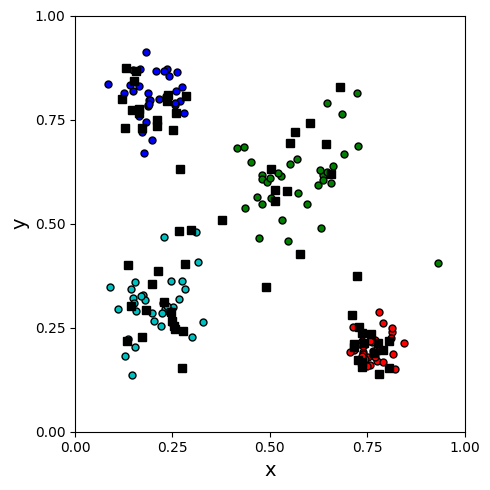

In [12]:
DATA = cm.getTestDataSet()
CLASSIFIED = cm.getTestClassified()
NOT_CLASSIFIED = cm.getTestNotClassified()
cm.displayDataSet(plt, DATA, CLASSIFIED, NOT_CLASSIFIED) #plt = plot package; see the imports above

### CLASS 1 = BLUE
### CLASS 2 = GREEN
### CLASS 3 = RED
### CLASS 4 = CYAN

2.3) k-NN implementation: Complete the below function. Use the "non-weighted" variant of k-NN.  <br>
(Advanced*) Add support to "weighted" variant of k-NN

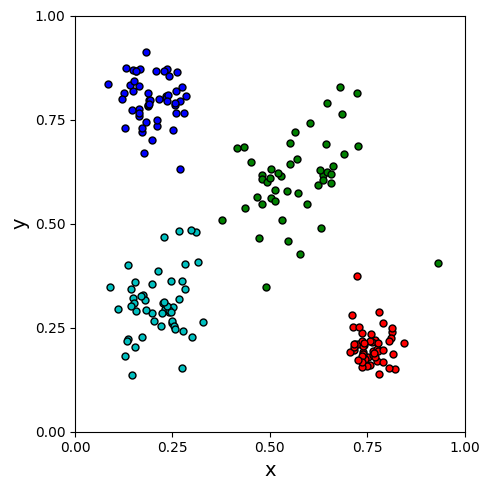

In [13]:
def doKNN(K, DATA, CLASSIFIED, NOT_CLASSIFIED):
    ### COPY INPUT CLASSIFIED OBJECTS 
    ### WHEN CLASSIFYING "NOT_CLASSIFIED" OBJECTS, UPDATE THE CL, i.e., ADD RESPECTIVE INDICES 
    CL = copy.deepcopy(CLASSIFIED)
    ### For each index in NOT_CLASSIFIED, store here its corresponding (computed) class (in this exercise = 0, 1, or 2)
    UPDATE = [[] for i in range(len(CLASSIFIED))]
    classified_indices = list()
    for i in range(len(CLASSIFIED)):
        classified_indices += CLASSIFIED[i]
    for IDX in NOT_CLASSIFIED:
        neighbors = [(-1, np.inf) for i in range(K)]
        for clf_idx in classified_indices:
            distance = cm.getEuclideanDistance(DATA[IDX], DATA[clf_idx])
            near_idx = K
            for i in reversed(range(K)):
                if distance < neighbors[i][1]:
                    near_idx = i
                else:
                    break
            neighbors.insert(near_idx, (clf_idx, distance))
            neighbors.pop()
        class_count = [0 for i in range(4)]
        for neighbor in neighbors:
            for i in range(len(CLASSIFIED)):
                if neighbor[0] in CLASSIFIED[i]:
                    class_count[i] += 1
                    break
        max_class = (-1, 0)
        for i in range(len(CLASSIFIED)):
            if class_count[i] > max_class[1]:
                max_class = (i, class_count[i])
        UPDATE[max_class[0]].append(IDX)

    ################
    for i in range(len(CLASSIFIED)):
        CL[i] += UPDATE[i]

    return CL
#DISPLAY CLASSIFIED DATA
NEW_CLASSIFIED = doKNN(2, DATA, CLASSIFIED, NOT_CLASSIFIED)
cm.displayDataSet(plt, DATA, NEW_CLASSIFIED)

# Part 3 - performance evaluation

3.1) You are asked to evaluate the performance of k-NN (weighted variant) for different K. Firstly, run the below piece of code and analyze the data. **Which class do you think is the most difficult/easiest to describe/characterize?**

We think the easiest one is *Blue* because it doesn't seem overlap with any other classes.

We're quite unsure when it comes to the most difficult one. Both *Green* and *Red* overlap with each other. *Green* is
very dispersed, whereas *Red* seems to require a more complex shape/function to do the classification precisely.

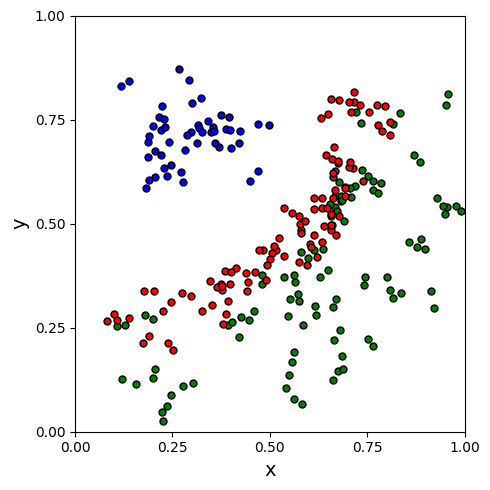

In [14]:
DATA_2 = cm.getTest2DataSet()
CLASSIFIED_2 = cm.getTest2Classified()
cm.displayDataSet(plt, DATA_2, CLASSIFIED_2)

### CLASS 1 = BLUE
### CLASS 2 = GREEN
### CLASS 3 = RED

3.2) To evaluate the performance of k-NN, you can check how well it predicts classes for new (not known previously) objects. For this reason, assume that you "do not know" the true class assignments for some random subset of objects from the data set. Firstly, you can generate some permutation of indices from 0 to 249 (one per object):

In [15]:
idxs = [i for i in range(250)]
np.random.shuffle(idxs)

Then, the below piece of code constructs temporary variables CLASSIFIED_TRAIN and NOT_CLASSIFIED_TEST. CLASSIFIED_TRAIN contains information on assignments for the first 75% random objects determined by "idxs", while NOT_CLASSIFIED_TEST contains the remaining "not classified" object indices. Run the code below and observe that 25% of some uniformly distributed data points are not classified.

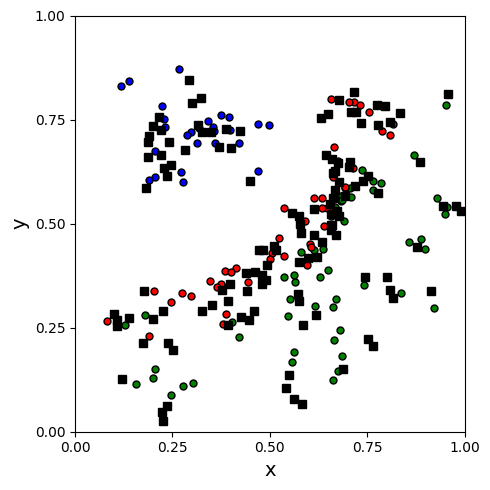

In [16]:
CLASSIFIED_TRAIN = [[], [], []]
NOT_CLASSIFIED_TEST = []
LIM = int(len(DATA_2) * 0.5)
for i in range(LIM):
    if idxs[i] < 50: CLASSIFIED_TRAIN[0].append(idxs[i])
    elif idxs[i] < 150: CLASSIFIED_TRAIN[1].append(idxs[i])
    else: CLASSIFIED_TRAIN[2].append(idxs[i])
for i in range(LIM, 250):
    NOT_CLASSIFIED_TEST.append(idxs[i])
cm.displayDataSet(plt, DATA_2, CLASSIFIED_TRAIN, NOT_CLASSIFIED_TEST)

3.3) Evaluate the performance of the weighted variant of k-NN for K = 1,3,5,7 and CLASSIFIED_TRAIN, NOT_CLASSIFIED_TEST data sets. For each K:<br>
- for each class, compute how many times an object has been correctly/incorrectly classified. E.g., if 10 objects are associated with the first class "BLUE" but k-NN classified correctly only 4 of them, the result is 4 (or 6 in case of incorrect assignments stat);<br>
- for each class, compute recall (number of correct assignments / total number of expected assignments, e.g., if 10 objects are associated with the first class "BLUE"  but k-NN classified correctly only 4 of them, recall for the first class is 40%);<br>  

**Which class got the best/the worst recall. Why?**<br>
**What is the best K. Are there any significant differences?**<br>
You can use cm.displayCompareDataSet(plt, DATA_2, CLASSIFIED_2, CL) to check (display) which solutions were classified incorrectly. These are marked with squares. The background of these squares is appropriately selected according to the true (expected) assignment. 

1
[24, 36, 44]
[0, 9, 12]
[1.0, 0.8, 0.7857142857142857]
Sum of recalls: 2.585714285714286


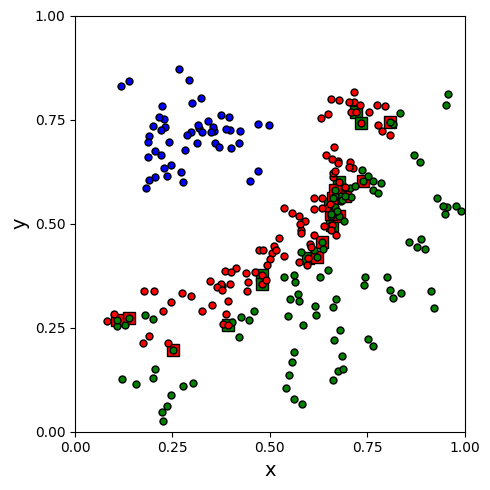

3
[24, 35, 38]
[0, 10, 18]
[1.0, 0.7777777777777778, 0.6785714285714286]
Sum of recalls: 2.4563492063492065


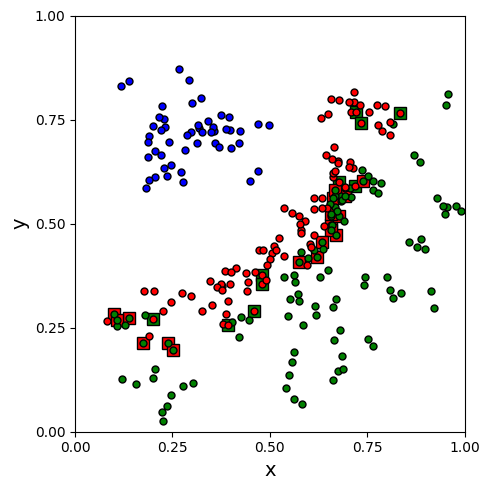

5
[24, 31, 45]
[0, 14, 11]
[1.0, 0.6888888888888889, 0.8035714285714286]
Sum of recalls: 2.4924603174603175


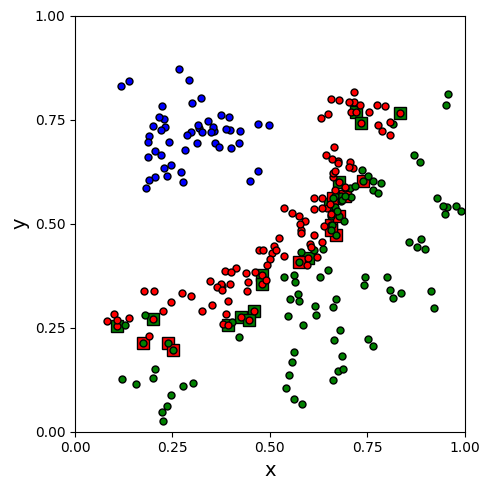

7
[24, 35, 42]
[0, 10, 14]
[1.0, 0.7777777777777778, 0.75]
Sum of recalls: 2.5277777777777777


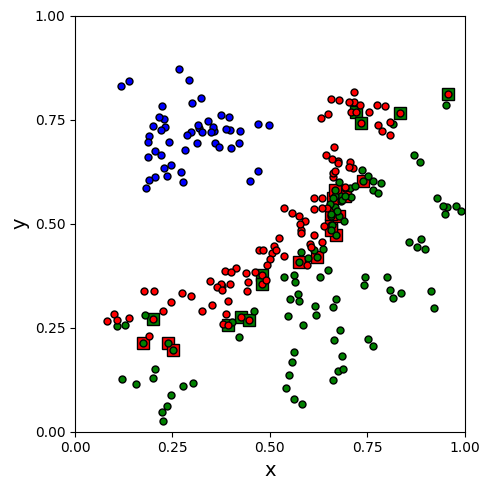

In [17]:
### CLASS 1 = BLUE
### CLASS 2 = GREEN
### CLASS 3 = RED

for K in [1,3,5,7]:
    CL = doKNN(K, DATA_2, CLASSIFIED_TRAIN, NOT_CLASSIFIED_TEST)
    print(K)
    CORRECTLY = [0,0,0]
    INCORRECTLY = [0,0,0]
    RECALL = [0,0,0]
    
    for idx in NOT_CLASSIFIED_TEST:
        true_class = -1
        for i in range(3):
            if idx in CLASSIFIED_2[i]:
                true_class = i
                break
        if idx in CL[true_class]:
            CORRECTLY[true_class] += 1
        else:
            INCORRECTLY[true_class] += 1
    for i in range(3):
        RECALL[i] = CORRECTLY[i] / (CORRECTLY[i] + INCORRECTLY[i])

    ### PRINT STATS
    print(CORRECTLY)
    print(INCORRECTLY)
    print(RECALL)
    print("Sum of recalls: {}".format(sum(RECALL)))
    ### DISPLAY
    cm.displayCompareDataSet(plt, DATA_2, CLASSIFIED_2, CL)      

Output we refer to:
```
K = 1
[23, 36, 43]
[0, 13, 10]
[1.0, 0.7346938775510204, 0.8113207547169812]
Sum of recalls: 2.5460146322680015

K = 3
[23, 37, 44]
[0, 12, 9]
[1.0, 0.7551020408163265, 0.8301886792452831]
Sum of recalls: 2.5852907200616095

K = 5
[23, 32, 46]
[0, 17, 7]
[1.0, 0.6530612244897959, 0.8679245283018868]
Sum of recalls: 2.520985752791683

K = 7
[23, 35, 48]
[0, 14, 5]
[1.0, 0.7142857142857143, 0.9056603773584906]
Sum of recalls: 2.6199460916442048
```
## Comments
Even though we didn't do the weighted variant, it's apparent that choosing the right K belongs to the decision maker.
The recalls are quite similar, with the recall in classes *Green* and *Red* varying due to them overlapping. Therefore,
it depends purely on what the DM values more.